In [1]:
from google.colab import drive
drive.mount('/drive')
 
#Optional: move to the desired location:
%cd /drive/My Drive/500

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
/drive/My Drive/500


In [2]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import _pickle as cPickle
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
import pickle
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# from scipy.signal import convolve2d as conv2

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage
from scipy.stats import skew
from scipy.stats import kurtosis
import csv

In [3]:
def get_denoising(image):
    

    # resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)


    gauss =gray.astype("float32")


    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)


    
    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#     img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    
    return img
   





In [4]:

def hsv_image(img):
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     H = hsv[:,:,0]
#     S = hsv[:,:,1]
#     V = hsv[:,:,2]
    h, s, v = cv2.split(hsv)
 
    features = [   
            
                   np.mean(h),
                   np.mean(s),
                   np.mean(v),

                   np.std(h),
                   np.std(s),
                   np.std(v),

                   np.var(h),
                   np.var(s),
                   np.var(v),


                   skew(h, axis=None),
                   skew(s, axis=None),
                   skew(v, axis=None), 
               
                   kurtosis(h, None, fisher=False),
                   kurtosis(s, None, fisher=False),
                   kurtosis(v, None, fisher=False)]

    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],
        
        
        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]



    }
    print(fitur)
    return fitur


In [5]:
imagePaths = list(paths.list_images('/drive/My Drive/datasetku'))

In [6]:
data_hsv = []
# labels = pd.DataFrame(columns=['label'])
data_glcm =[]
labels=[]

# image_fitur.append(fitur)


In [7]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    features = get_denoising(resizing)
    # gray = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    data_glcm.append(features)
 
    features_hsv = get_denoising(resizing)
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    
 
 
    data_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv"
    try:
      with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_hsv:
          writer.writerow(data)
    except IOError:
        print("I/O error")
     
 
        
    label = imagePath.split(os.path.sep)[-2]
 
    labels.append(label)
 
#     labels.loc[len(labels)] = label
 
 
 
 
 
    if  i > 0 and i % 1 == 0:
 
        print("{}/{}".format(i, len(imagePaths)))

{'mean_h': 16.674964126275512, 'mean_s': 63.22690130739796, 'mean_v': 137.59018255739795, 'std_h': 34.18486259727121, 'std_s': 24.27013177239685, 'std_v': 28.501593617309176, 'var_h': 1168.6048307943124, 'var_s': 589.0392962495071, 'var_v': 812.3408387262392, 'skew_h': 4.161698297190921, 'skew_s': 0.4900526189074582, 'skew_v': -1.108027909049409, 'kurt_h': 19.14623890069313, 'kurt_s': 3.489828965619353, 'kurt_v': 4.605569246809617}
{'mean_h': 8.50113600127551, 'mean_s': 111.19895966198979, 'mean_v': 150.71882971938774, 'std_h': 2.33235723917537, 'std_s': 35.7388093218416, 'std_v': 13.722923283291966, 'var_h': 5.439890291133755, 'var_s': 1277.2624917429519, 'var_v': 188.31862343911675, 'skew_h': -0.26009173672057057, 'skew_s': 0.20122330384834705, 'skew_v': -1.4793279486712985, 'kurt_h': 2.8047966828288677, 'kurt_s': 1.4363547637838159, 'kurt_v': 5.885755550152928}
1/225
{'mean_h': 10.597955197704081, 'mean_s': 96.51287468112245, 'mean_v': 139.44499362244898, 'std_h': 21.20421075388233,

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

hsv_df = pd.read_csv("/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv")

hsv_df.head()

mean_h      mean_s      mean_v  ...     kurt_h    kurt_s    kurt_v
0  16.674964   63.226901  137.590183  ...  19.146239  3.489829  4.605569
1   8.501136  111.198960  150.718830  ...   2.804797  1.436355  5.885756
2  10.597955   96.512875  139.444994  ...  53.502796  3.764758  3.942526
3  17.442781   99.343989  161.531609  ...  14.861249  2.571431  1.704511
4  10.195352  101.706573  147.925143  ...  92.184242  2.029081  2.543007

[5 rows x 15 columns]

In [9]:
print(hsv_df)

        mean_h      mean_s      mean_v  ...       kurt_h    kurt_s     kurt_v
0    16.674964   63.226901  137.590183  ...    19.146239  3.489829   4.605569
1     8.501136  111.198960  150.718830  ...     2.804797  1.436355   5.885756
2    10.597955   96.512875  139.444994  ...    53.502796  3.764758   3.942526
3    17.442781   99.343989  161.531609  ...    14.861249  2.571431   1.704511
4    10.195352  101.706573  147.925143  ...    92.184242  2.029081   2.543007
..         ...         ...         ...  ...          ...       ...        ...
220  13.098593   72.185706  137.603934  ...    46.774810  3.770466  10.425227
221  32.070990   52.266462  148.768973  ...     5.038243  2.569409   6.052389
222  16.909997   68.322684  160.590621  ...    28.853330  3.853902   4.464449
223   8.404715   82.818678  184.756597  ...  3233.910631  3.252322   2.008980
224  18.746193   86.130281  155.345743  ...    11.571281  4.859387   4.180293

[225 rows x 15 columns]


In [10]:
# hsv_df.drop('Unnamed: 0', axis=1)


In [11]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']



glcm_all_agls = []
for img, label in zip(data_glcm, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")
# columns.loc[len(labels)] = label

In [12]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
# glcm_df = pd.DataFrame(data)

glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("/drive/My Drive/TA/dobel/glcm_hsv.csv", index=False)

glcm_df.head(1000)

contrast_0  contrast_45  ...  homogeneity_135     label
0     65.769619    92.737839  ...         0.172843  Melanoma
1     14.451634    30.362927  ...         0.332420  Melanoma
2    137.698951   180.418649  ...         0.142392  Melanoma
3     54.282231    86.726256  ...         0.200651  Melanoma
4     25.309497    39.586016  ...         0.261152  Melanoma
..          ...          ...  ...              ...       ...
220    1.437460     2.208932  ...         0.600457       Bcc
221   55.747678   102.470912  ...         0.262890       Bcc
222   32.610686    44.630155  ...         0.326281       Bcc
223    9.532771    14.725995  ...         0.385559       Bcc
224   38.699812    64.713326  ...         0.265804       Bcc

[225 rows x 17 columns]

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

glcm_df.to_csv("/drive/My Drive/TA/dobel/glcm_hsv.csv", index=False)
# glcm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

glcm_df.head(120)

contrast_0  contrast_45  ...  homogeneity_135     label
0     65.769619    92.737839  ...         0.172843  Melanoma
1     14.451634    30.362927  ...         0.332420  Melanoma
2    137.698951   180.418649  ...         0.142392  Melanoma
3     54.282231    86.726256  ...         0.200651  Melanoma
4     25.309497    39.586016  ...         0.261152  Melanoma
..          ...          ...  ...              ...       ...
115   67.318205    75.134931  ...         0.155321    Normal
116   76.226537    86.302520  ...         0.180691    Normal
117  277.819607   312.929920  ...         0.107007    Normal
118  111.846212   130.107905  ...         0.132170    Normal
119  194.795924   240.397213  ...         0.131306    Normal

[120 rows x 17 columns]

In [14]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv')
df2 = pd.read_csv('/drive/My Drive/TA/dobel/glcm_hsv.csv')
result = pd.merge(df1, df2, left_index=True, right_index=True)
result.to_csv('/drive/My Drive/TA/dobel/merged_hsv_glcm.csv', index=False)


result = pd.read_csv("/drive/My Drive/TA/dobel/merged_hsv_glcm.csv")




result.head(1000)

mean_h      mean_s  ...  homogeneity_135     label
0    16.674964   63.226901  ...         0.172843  Melanoma
1     8.501136  111.198960  ...         0.332420  Melanoma
2    10.597955   96.512875  ...         0.142392  Melanoma
3    17.442781   99.343989  ...         0.200651  Melanoma
4    10.195352  101.706573  ...         0.261152  Melanoma
..         ...         ...  ...              ...       ...
220  13.098593   72.185706  ...         0.600457       Bcc
221  32.070990   52.266462  ...         0.262890       Bcc
222  16.909997   68.322684  ...         0.326281       Bcc
223   8.404715   82.818678  ...         0.385559       Bcc
224  18.746193   86.130281  ...         0.265804       Bcc

[225 rows x 32 columns]

In [15]:
# result.drop('label', axis=1, inplace=True)
# result.head(1000)

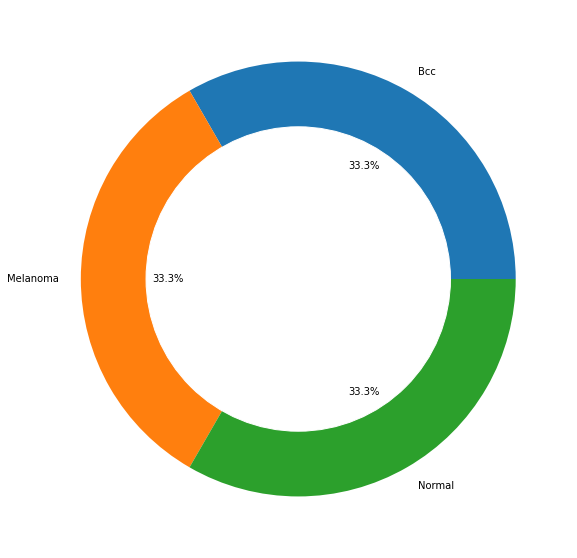

In [16]:
label_distr = result['label'].value_counts()

label_name = ['Bcc',   'Melanoma','Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
print(label_distr)

Melanoma    75
Bcc         75
Normal      75
Name: label, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(X.values)



X = decimal_scaling(
            result[['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v',
                    'contrast_0', 'correlation_0', 'energy_0','homogeneity_0',
                    'contrast_45', 'correlation_45', 'energy_45','homogeneity_45',
                    'contrast_90', 'correlation_90', 'energy_90','homogeneity_90',
                    'contrast_135', 'correlation_135', 'energy_135','homogeneity_135'
                   ]].values
                    )

# ,
#                     'ASM_0','ASM_45','ASM_90','ASM_135', 'dissimilarity_0','dissimilarity_45',
#                      'dissimilarity_90','dissimilarity_135'

In [19]:
le = LabelEncoder()
le.fit(result["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(result['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Melanoma' 'Normal']


 one hot encoding for sample 0 : 
 [0. 1. 0.]


In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [21]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
     fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
     fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     tp = np.diag(cnf_matrix)
     tn = cnf_matrix.sum() - (fp + fn + tp)
 
     fp = fp.astype(float)
     fn = fn.astype(float)
     tp = tp.astype(float)
     tn = tn.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[tp,fp],[fn,tn]]))
     print('sensitivity is %f',1.*tp/(tp+fn))
     print('specificity is %f',1.*tn/(tn+fp))
     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 44ms/step - loss: 1.0924 - accuracy: 0.4722 - val_loss: 1.0892 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0716 - accuracy: 0.4944 - val_loss: 1.0784 - val_accuracy: 0.4222
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0508 - accuracy: 0.5667 - val_loss: 1.0599 - val_accuracy: 0.4889
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0228 - accuracy: 0.5944 - val_loss: 1.0276 - val_accuracy: 0.5333
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9803 - accuracy: 0.6111 - val_loss: 0.9764 - val_accuracy: 0.5556
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9249 - accuracy: 0.6500 - val_loss: 0.9097 - val_accuracy: 0.6889
Epoch 7/100
6/6 [=============================

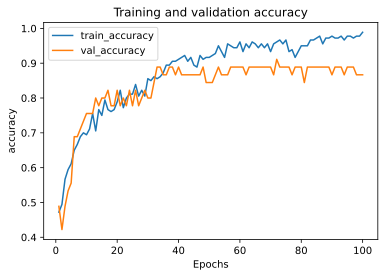

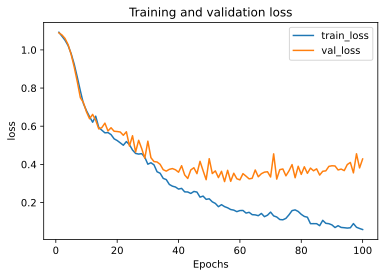

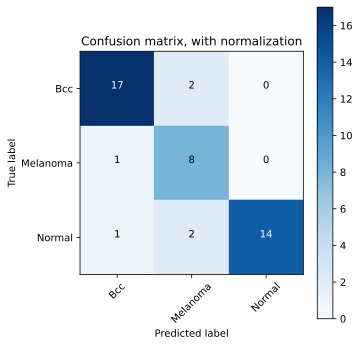

              precision    recall  f1-score   support

         Bcc       0.89      0.89      0.89        19
    Melanoma       0.67      0.89      0.76         9
      Normal       1.00      0.82      0.90        17

    accuracy                           0.87        45
   macro avg       0.85      0.87      0.85        45
weighted avg       0.89      0.87      0.87        45

Deep Neural Network
confusion matrix
[[[17.  8. 14.]
  [ 2.  4.  0.]]

 [[ 2.  1.  3.]
  [24. 32. 28.]]]
sensitivity is %f [0.89 0.89 0.82]
specificity is %f [0.92 0.89 1.  ]
accuracy is %f [0.91 0.89 0.93]
balanced accuracy is % [0.91 0.89 0.91]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 40ms/step - loss: 1.0955 - accuracy: 0.4000 - val_loss: 1.1338 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0743 - accuracy: 0.5444 - val_loss: 1.

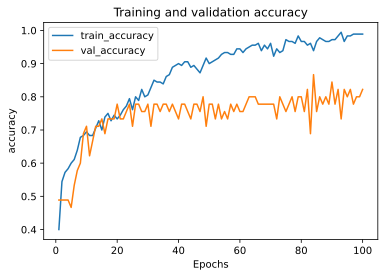

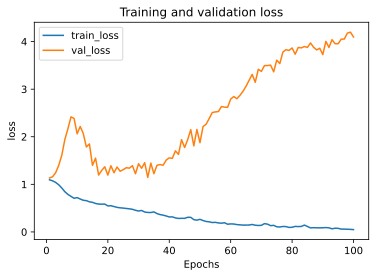

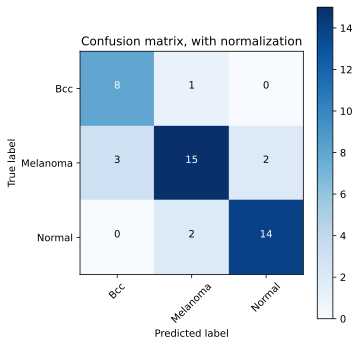

              precision    recall  f1-score   support

         Bcc       0.73      0.89      0.80         9
    Melanoma       0.83      0.75      0.79        20
      Normal       0.88      0.88      0.88        16

    accuracy                           0.82        45
   macro avg       0.81      0.84      0.82        45
weighted avg       0.83      0.82      0.82        45

Deep Neural Network
confusion matrix
[[[ 8. 15. 14.]
  [ 3.  3.  2.]]

 [[ 1.  5.  2.]
  [33. 22. 27.]]]
sensitivity is %f [0.89 0.75 0.88]
specificity is %f [0.92 0.88 0.93]
accuracy is %f [0.91 0.82 0.91]
balanced accuracy is % [0.9  0.81 0.9 ]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 1.0863 - accuracy: 0.4889 - val_loss: 1.0697 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0564 - accuracy: 0.5278 - val_loss: 1

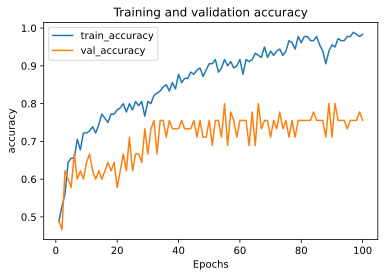

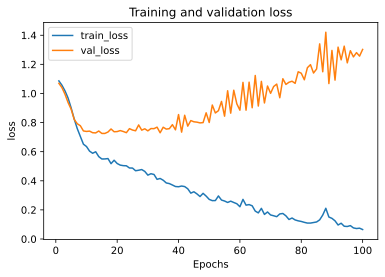

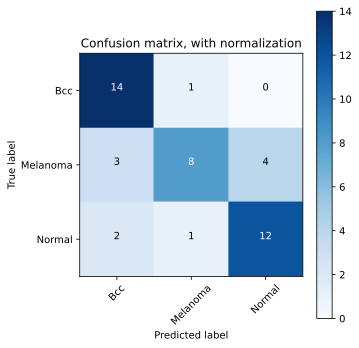

              precision    recall  f1-score   support

         Bcc       0.74      0.93      0.82        15
    Melanoma       0.80      0.53      0.64        15
      Normal       0.75      0.80      0.77        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.76      0.76      0.75        45

Deep Neural Network
confusion matrix
[[[14.  8. 12.]
  [ 5.  2.  4.]]

 [[ 1.  7.  3.]
  [25. 28. 26.]]]
sensitivity is %f [0.93 0.53 0.8 ]
specificity is %f [0.83 0.93 0.87]
accuracy is %f [0.87 0.8  0.84]
balanced accuracy is % [0.88 0.73 0.83]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 78ms/step - loss: 1.0993 - accuracy: 0.4778 - val_loss: 1.0798 - val_accuracy: 0.4444
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0536 - accuracy: 0.5111 - val_loss: 1.

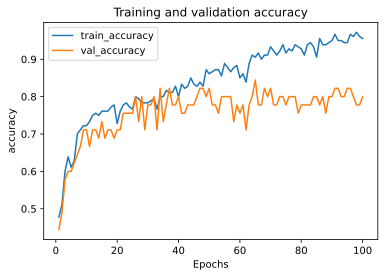

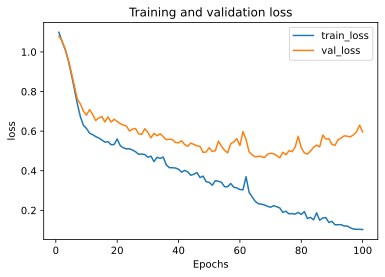

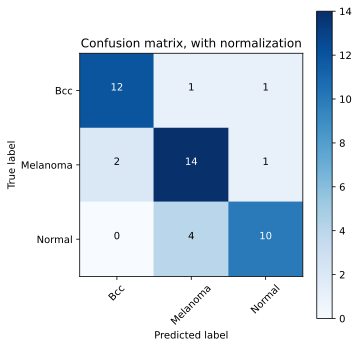

              precision    recall  f1-score   support

         Bcc       0.86      0.86      0.86        14
    Melanoma       0.74      0.82      0.78        17
      Normal       0.83      0.71      0.77        14

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

Deep Neural Network
confusion matrix
[[[12. 14. 10.]
  [ 2.  5.  2.]]

 [[ 2.  3.  4.]
  [29. 23. 29.]]]
sensitivity is %f [0.86 0.82 0.71]
specificity is %f [0.94 0.82 0.94]
accuracy is %f [0.91 0.82 0.87]
balanced accuracy is % [0.9  0.82 0.82]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 31) (45, 31)
Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 1.0863 - accuracy: 0.5222 - val_loss: 1.0754 - val_accuracy: 0.4444
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0548 - accuracy: 0.4389 - val_loss: 1.

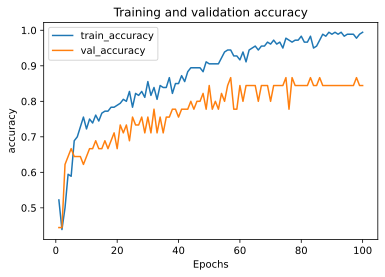

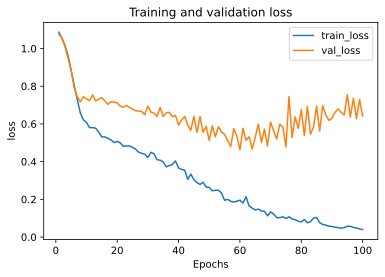

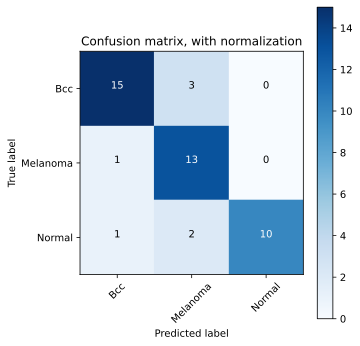

              precision    recall  f1-score   support

         Bcc       0.88      0.83      0.86        18
    Melanoma       0.72      0.93      0.81        14
      Normal       1.00      0.77      0.87        13

    accuracy                           0.84        45
   macro avg       0.87      0.84      0.85        45
weighted avg       0.87      0.84      0.85        45

Deep Neural Network
confusion matrix
[[[15. 13. 10.]
  [ 2.  5.  0.]]

 [[ 3.  1.  3.]
  [25. 26. 32.]]]
sensitivity is %f [0.83 0.93 0.77]
specificity is %f [0.93 0.84 1.  ]
accuracy is %f [0.89 0.87 0.93]
balanced accuracy is % [0.88 0.88 0.88]




Rata-Rata Akurasi
81.78% (+/- 3.82%)


In [22]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(31, input_dim=31, activation='relu'))

  model.add(Dense(128, activation='relu'))

  

  model.add(Dense(128, activation='relu'))

  model.add(Dense(128, activation='relu'))



  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))



  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, 
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)




  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma','Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',   'Melanoma','Normal']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




# save_model_path = "/drive/My Drive/Moddel/model_new2.h5"
# model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)

In [23]:
%cd /drive/My Drive/Moddel/

/drive/My Drive/Moddel


In [24]:
#  from sklearn import metrics
    
# recall_sensitivity = metrics.recall_score(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1), pos_label=1, average=None)
# recall_specificity = metrics.recall_score(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1), pos_label=0, average=None)
# recall_sensitivity, recall_specificity 

In [25]:
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)

# print(TPR)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# print(TNR)
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)
# # Overall accuracy for each class
# ACC = (TP+TN)/(TP+FP+FN+TN)

In [26]:


# # # Variables for average classification report
# # originalclass = []
# # predictedclass = []

# # #Make our customer score
# # def classification_report_with_accuracy_score(y_true, y_pred):
# #     originalclass.extend(y_true)
# #     predictedclass.extend(y_pred)
# #     return accuracy_score(y_true, y_pred) # return accuracy score

# # inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
# # outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

# # # Non_nested parameter search and scoring
# # clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# # # Nested CV with parameter optimization
# # nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# # # Average values in classification report for all folds in a K-fold Cross-validation  
# # print(classification_report(originalclass, predictedclass)) 

# from sklearn.model_selection._validation import cross_val_score
# from sklearn.metrics import classification_report, accuracy_score, make_scorer
# originalclass = []
# predictedclass = []

# def classification_report_with_accuracy_score(y_val_kf, y_pred):
#     originalclass.extend(y_val_kf)
#     predictedclass.extend(y_pred)
#     return accuracy_score(y_val_kf, y_pred) # return accuracy score

# inner_cv = StratifiedKFold(n_splits=10)
# outer_cv = StratifiedKFold(n_splits=10)

# # Nested CV with parameter optimization
# nested_score = cross_val_score(history, X, Y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# # Average values in classification report for all folds in a K-fold Cross-validation  
# print(classification_report(originalclass, predictedclass)) 

In [27]:

# #def defines a function for calculating the confusion matrix
# # calculate a confusion matrix
# def confusion_matrix(actual, predicted):
# 	unique = set(actual)
# 	matrix = [list() for x in range(len(unique))]
# 	for i in range(len(unique)):
# 		matrix[i] = [0 for x in range(len(unique))]
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for i in range(len(actual)):
# 		x = lookup[actual[i]]
# 		y = lookup[predicted[i]]
# 		matrix[y][x] += 1
# 	return unique, matrix
 
# # pretty print a confusion matrix
# def print_confusion_matrix(unique, matrix):
# 	print('(A)' + ' '.join(str(x) for x in unique))
# 	print('(P)-------')
# 	for i, x in enumerate(unique):
# 		print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))

In [28]:
# # Test confusion matrix for the Evaluate results
# unique, matrix = confusion_matrix(Y, rounded)
# print_confusion_matrix(unique, matrix)